In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X.shape

torch.Size([83680, 160])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666, shuffle=True)

In [6]:
X_train.shape

(66944, 160)

In [7]:
y_train.shape

(66944,)

In [9]:
def RNNPreporces_batch(X, y, batch_size):
    length = (X.shape[0]//batch_size)*batch_size
    return X[:length, :], y[:length]

In [10]:
X_train, y_train = RNNPreporces_batch(X_train, y_train, batch_size=100)
X_test, y_test = RNNPreporces_batch(X_test, y_test, batch_size=100)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66900, 160)
(66900,)
(16700, 160)
(16700,)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [14]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [15]:
torch.cuda.is_available()

True

In [16]:
torch.cuda.get_device_name()

'GeForce GTX 1070'

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [36]:
model_name = "DeepLSTM_VAE_NLL_140ep_hidden-64_lr-1e-3_bs-100"

In [18]:
#deepmodel.eval()

In [19]:
deepmodel = m.DeepLSTM_VAE(
                        sequence_len=160, 
                        n_features=1,
                        latent_dim=15,
                        hidden_size=64,
                        num_layers=1,
                        batch_size=100,
                        use_cuda=True
                        )
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-3),
        loss_function="GaussianNLL",
        verbose=True
        )

cuda:0


In [20]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:229.1053, validation_loss:233.9366
Epoch [2/100], average_loss:227.0572, validation_loss:196.1933
Epoch [3/100], average_loss:174.3454, validation_loss:166.4465
Epoch [4/100], average_loss:167.7925, validation_loss:167.4354
Epoch [5/100], average_loss:167.0413, validation_loss:165.1995
Epoch [6/100], average_loss:167.2288, validation_loss:166.5512
Epoch [7/100], average_loss:166.3952, validation_loss:167.0881
Epoch [8/100], average_loss:167.4203, validation_loss:167.0256
Epoch [9/100], average_loss:171.1618, validation_loss:200.1451
Epoch [10/100], average_loss:199.0023, validation_loss:197.4681
Epoch [11/100], average_loss:194.9429, validation_loss:234.2887
Epoch [12/100], average_loss:196.5179, validation_loss:192.6212
Epoch [13/100], average_loss:209.7220, validation_loss:228.2566
Epoch [14/100], average_loss:227.8650, validation_loss:227.8804
Epoch [15/100], average_loss:227.4171, validation_loss:227.2517
Epoch [16/100], average_loss:227.3023, validation

In [31]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:-53.7414, validation_loss:-64.4137
Epoch [2/100], average_loss:-53.2252, validation_loss:26.7968
Epoch [3/100], average_loss:-48.0497, validation_loss:-58.7982
Epoch [4/100], average_loss:-64.1068, validation_loss:-56.2516
Epoch [5/100], average_loss:-57.8269, validation_loss:-23.1207
Epoch [6/100], average_loss:-45.2563, validation_loss:-76.5839
Epoch [7/100], average_loss:-56.1360, validation_loss:-78.2278
Epoch [8/100], average_loss:-60.8244, validation_loss:41.6852
Epoch [9/100], average_loss:-56.7517, validation_loss:-66.8232
Epoch [10/100], average_loss:-49.7484, validation_loss:-61.5765
Epoch [11/100], average_loss:-72.5396, validation_loss:-78.2764
Epoch [12/100], average_loss:-66.5483, validation_loss:-9.2539
Epoch [13/100], average_loss:-54.2035, validation_loss:-68.3647
Epoch [14/100], average_loss:-57.8140, validation_loss:-73.9133
Epoch [15/100], average_loss:-67.4468, validation_loss:-64.8109
Epoch [16/100], average_loss:-64.8986, validation_lo

KeyboardInterrupt: 

In [33]:
#for g in svi.optimizer.param_groups:
#    g['lr'] = 1e-4
#    print("changed")
svi.optimizer = torch.optim.Adam(svi.model.parameters(), lr=1e-4)

In [34]:
loss_hist = svi(epochs=10, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/10], average_loss:-91.2426, validation_loss:-94.5350
Epoch [2/10], average_loss:-97.2529, validation_loss:-95.2109
Epoch [3/10], average_loss:-98.3879, validation_loss:-96.7412
Epoch [4/10], average_loss:-98.8850, validation_loss:-96.9713
Epoch [5/10], average_loss:-99.4881, validation_loss:-96.5098
Epoch [6/10], average_loss:-99.8265, validation_loss:-98.2659
Epoch [7/10], average_loss:-100.1731, validation_loss:-97.3978
Epoch [8/10], average_loss:-100.2458, validation_loss:-97.4350
Epoch [9/10], average_loss:-100.3637, validation_loss:-97.3486
Epoch [10/10], average_loss:-100.8241, validation_loss:-98.6305


In [35]:
svi.model==deepmodel

True

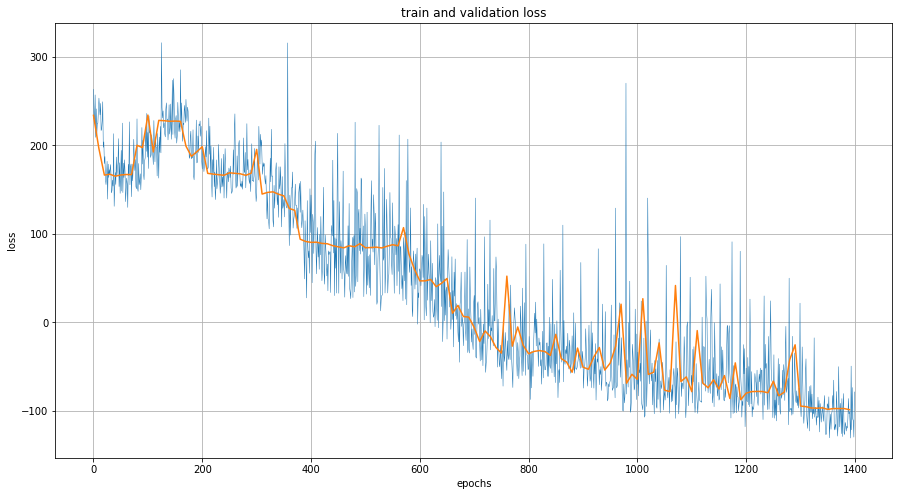

In [37]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"]))*10, svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [38]:
torch.save(svi.model, f"VAE_saves_and_logs/{model_name}.pt")
torch.save(svi.optimizer, f"VAE_saves_and_logs/{model_name}_optimizer.pt")
dd.save(f"VAE_saves_and_logs/{model_name}_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


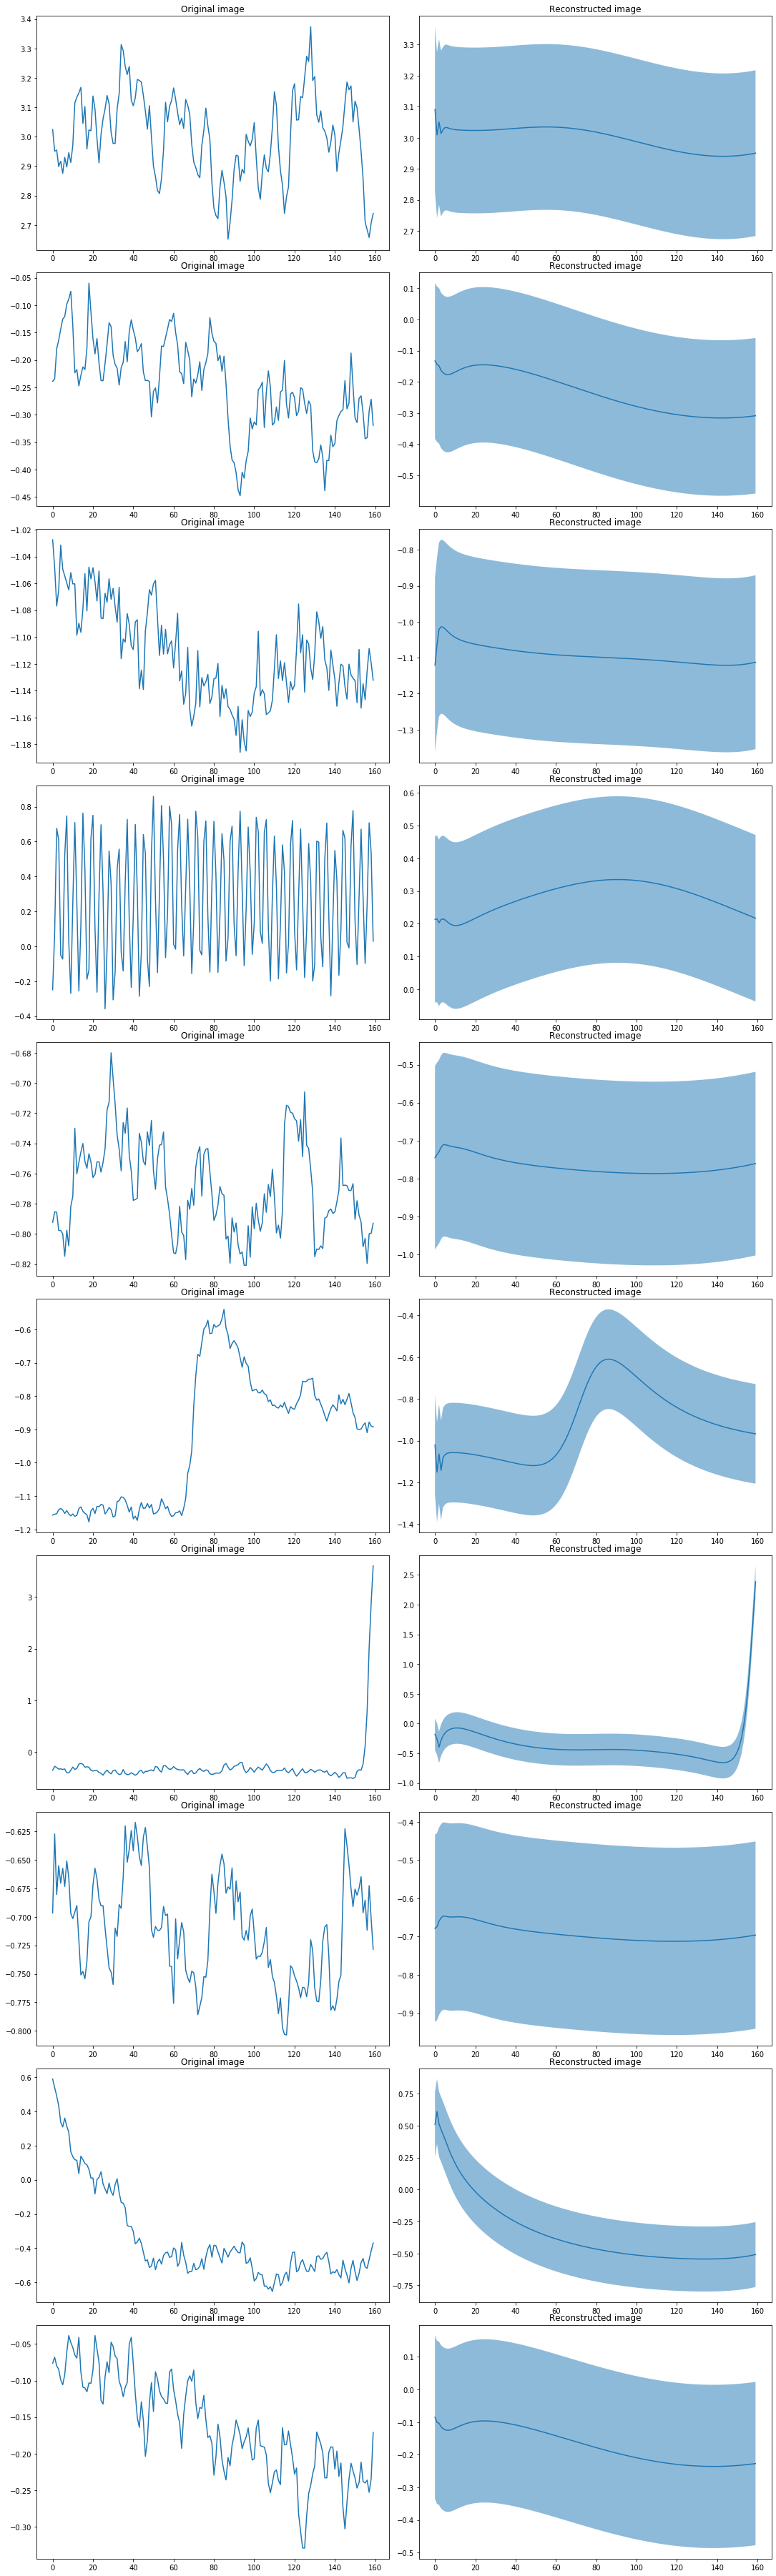

In [39]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [40]:
mod = torch.load(f"VAE_saves_and_logs/{model_name}.pt")

In [41]:
mod.eval()

DeepLSTM_VAE(
  (encoder_reshape): Reshape()
  (encoder_lstm): LSTM(1, 64)
  (encoder_output): VariationalLayer(
    (mu): Linear(in_features=64, out_features=15, bias=True)
    (rho): Linear(in_features=64, out_features=15, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
  )
  (decoder_hidden): Linear(in_features=15, out_features=64, bias=True)
  (decoder_lstm): LSTM(1, 64)
  (decoder_output): RecurrentDecoderOutput(
    (mu): Linear(in_features=64, out_features=1, bias=True)
    (rho): Linear(in_features=10240, out_features=1, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
  )
)

In [42]:
z, mu, sigma = mod.encoder(X.to(device))

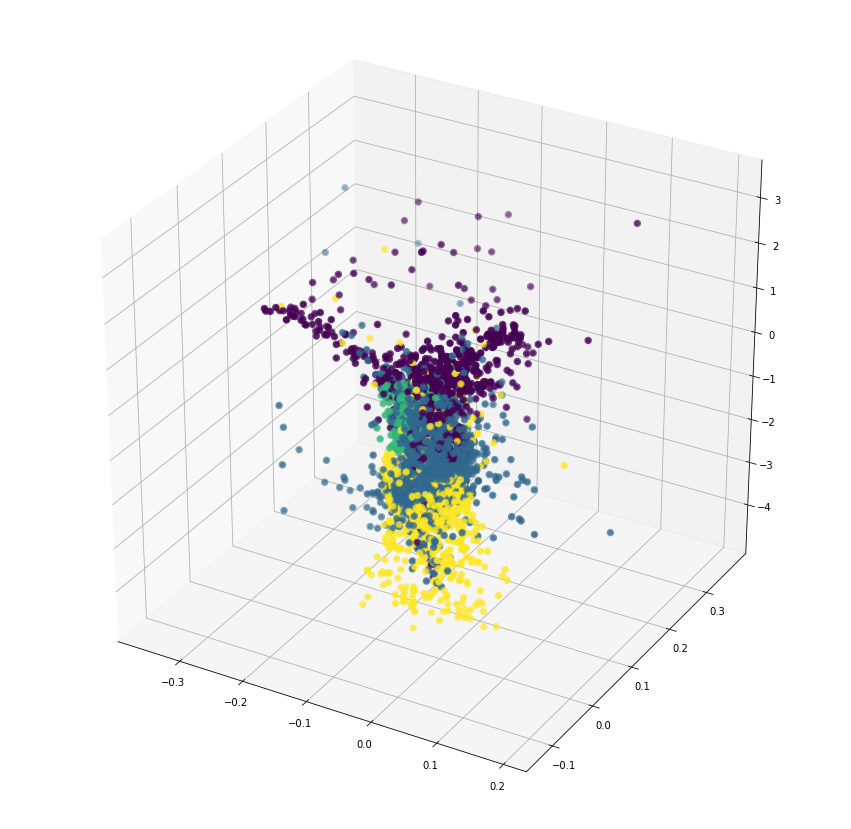

In [43]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

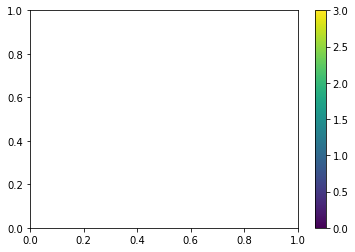

In [30]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [ ]:
test.y